#### Análise de Preço

In [1]:
# Libs iniciais / pacote padrão
import pandas as pd
import seaborn as sns
import seaborn.objects as so
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import shapiro, kstest, normaltest, anderson, probplot

# Desativar avisos de expiração
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)


# Definindo a quantidade de dados simulados
n = 1000

# Simulando os dados
np.random.seed(42)
clientes = [f'Cliente_{i}' for i in range(1, n + 1)]
valor_transacao = np.round(np.random.uniform(50, 500, n), 2)
valor_gasto = np.round(valor_transacao * np.random.uniform(0.95, 0.98, n), 2)
valor_lucro = valor_transacao - valor_gasto
taxa_lucro = np.round((valor_lucro / valor_gasto) * 100, 2)
mdr = taxa_lucro / valor_transacao

# Criando o DataFrame
df = pd.DataFrame({
    'Cliente': clientes,
    'Valor_Transacao': valor_transacao,
    'Valor_Gasto': valor_gasto,
    'Valor_Lucro': valor_lucro,
    'Taxa_Lucro': taxa_lucro,
    'mdr' : mdr
})

# Exibindo as primeiras linhas do DataFrame
df.head()


,Cliente,Valor_Transacao,Valor_Gasto,Valor_Lucro,Taxa_Lucro,mdr
0,Cliente_1,218.54,208.83,9.71,4.65,0.021278
1,Cliente_2,477.82,461.70,16.12,3.49,0.007304
2,Cliente_3,379.40,370.37,9.03,2.44,0.006431
3,Cliente_4,319.40,310.45,8.95,2.88,0.009017
4,Cliente_5,120.21,117.11,3.10,2.65,0.022045


In [2]:
# Calculando a média e o desvio padrão da coluna Valor_Transacao
media = df['Valor_Transacao'].mean()
desvio_padrao = df['Valor_Transacao'].std()

# Definindo os limites das categorias com base em frações do desvio padrão
bins = [
    -np.inf,  # Para incluir todos os valores menores que o primeiro limite
    media - desvio_padrao,
    media - (desvio_padrao / 1.5),
    media,
    media + (desvio_padrao / 1.5),
    np.inf  # Para incluir todos os valores maiores que o último limite
]

# Criando as categorias
labels = ['Muito Baixo', 'Baixo', 'Médio', 'Alto', 'Muito Alto']

# Criando a coluna categórica
df['faixa'] = pd.cut(df['Valor_Transacao'], bins=bins, labels=labels)

# Exibindo as primeiras linhas para verificar o resultado
print(df[['Valor_Transacao', 'faixa']].head())

   Valor_Transacao        faixa
0           218.54        Médio
1           477.82   Muito Alto
2           379.40   Muito Alto
3           319.40         Alto
4           120.21  Muito Baixo


In [3]:
df.head(3)

,Cliente,Valor_Transacao,Valor_Gasto,Valor_Lucro,Taxa_Lucro,mdr,faixa
0,Cliente_1,218.54,208.83,9.71,4.65,0.021278,Médio
1,Cliente_2,477.82,461.70,16.12,3.49,0.007304,Muito Alto
2,Cliente_3,379.40,370.37,9.03,2.44,0.006431,Muito Alto


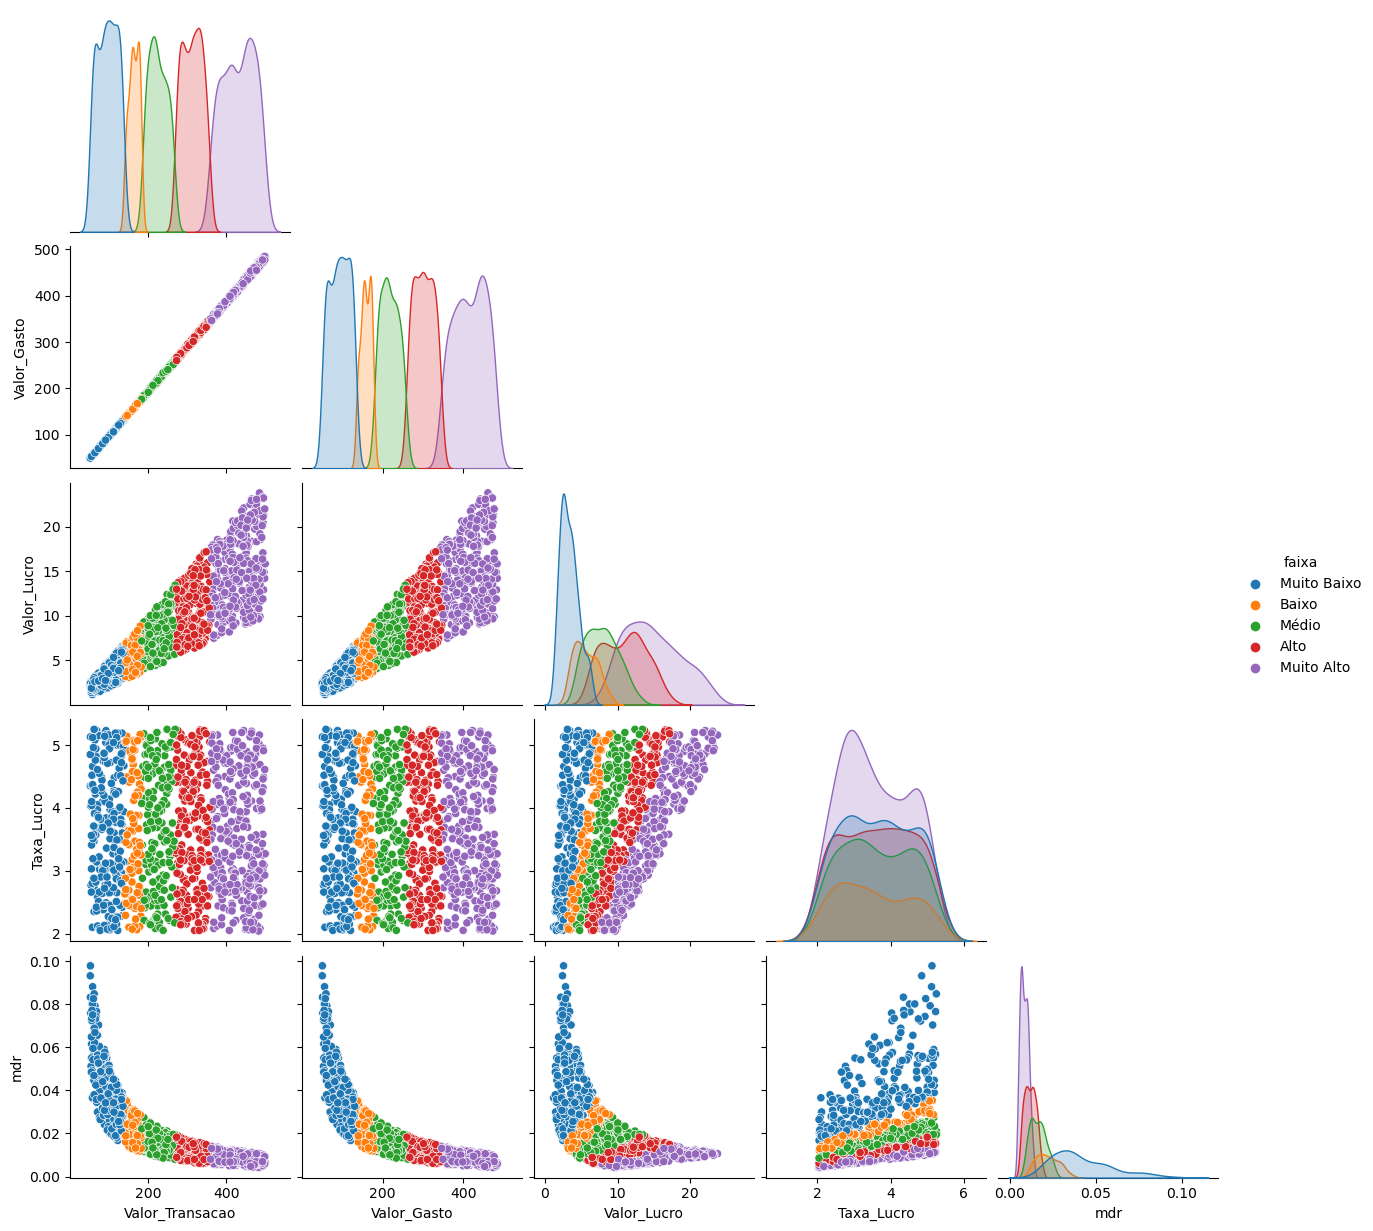

,Valor_Transacao,Valor_Gasto,Valor_Lucro,Taxa_Lucro,mdr
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,270.615350,261.234680,9.380670,3.612760,0.019110
std,131.461646,126.997188,5.190078,0.941511,0.015431
min,52.080000,49.670000,1.180000,2.040000,0.004224
25%,156.187500,149.835000,4.880000,2.800000,0.009156
50%,273.560000,264.045000,8.855000,3.570000,0.013435
75%,384.947500,371.377500,12.890000,4.470000,0.023246
max,499.870000,484.280000,23.780000,5.250000,0.097752


In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualizando a distribuição das variáveis
sns.pairplot(df[['Valor_Transacao', 'Valor_Gasto', 'Valor_Lucro', 'Taxa_Lucro', 'mdr', 'faixa']], corner=True, hue='faixa')
plt.show()

# Estatísticas descritivas
df.describe()


In [5]:
# Guardar as colunas categóricas originais
df['faixa_desc'] = df['faixa']

# Codificação de variáveis categóricas <<<<<<<<<< Tradução das colunas >>>>>>>>>>>>>
label_enc = LabelEncoder()
df['faixa'] = label_enc.fit_transform(df['faixa'])

In [6]:
# Amostra dos maiores valores em cada faixa
df.groupby('faixa_desc').max('Valor_Transacao')

,Valor_Transacao,Valor_Gasto,Valor_Lucro,Taxa_Lucro,mdr,faixa
faixa_desc,,,,,,
Muito Baixo,138.19,133.66,6.57,5.25,0.097752,3
Baixo,182.51,178.24,8.88,5.17,0.035314,1
Médio,270.25,262.34,13.44,5.25,0.027365,4
Alto,358.13,346.63,17.19,5.24,0.018996,0
Muito Alto,499.87,484.28,23.78,5.23,0.014188,2


In [7]:
# Definindo as variáveis independentes (X) e dependentes (y)
X = df[['Valor_Transacao', 'Valor_Gasto', 'faixa']]
y = df['mdr']


In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Criando o modelo de regressão linear
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)

# Previsões e avaliação
y_pred_lr = model_lr.predict(X_test)
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print(f"Regressão Linear - MSE: {mse_lr:.2f}, R²: {r2_lr:.2f}")


Regressão Linear - MSE: 0.00, R²: 0.59


In [10]:
from sklearn.tree import DecisionTreeRegressor

# Criando o modelo de árvore de decisão
model_dt = DecisionTreeRegressor(random_state=42)
model_dt.fit(X_train, y_train)

# Previsões e avaliação
y_pred_dt = model_dt.predict(X_test)
mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

print(f"Árvore de Decisão - MSE: {mse_dt:.2f}, R²: {r2_dt:.2f}")


Árvore de Decisão - MSE: 0.00, R²: 0.87


In [11]:
from sklearn.ensemble import RandomForestRegressor

# Criando o modelo de Random Forest
model_rf = RandomForestRegressor(random_state=42)
model_rf.fit(X_train, y_train)

# Previsões e avaliação
y_pred_rf = model_rf.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest - MSE: {mse_rf:.2f}, R²: {r2_rf:.2f}")


Random Forest - MSE: 0.00, R²: 0.92


In [12]:
from sklearn.model_selection import train_test_split

X = df[['Valor_Transacao', 'Valor_Gasto', 'faixa']]
y = df['Valor_Lucro']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Criando o modelo de regressão linear
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)

# Previsões e avaliação
y_pred_lr = model_lr.predict(X_test)
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print(f"Regressão Linear - MSE: {mse_lr:.2f}, R²: {r2_lr:.2f}")


Regressão Linear - MSE: 0.00, R²: 1.00


In [14]:
from sklearn.tree import DecisionTreeRegressor

# Criando o modelo de árvore de decisão
model_dt = DecisionTreeRegressor(random_state=42)
model_dt.fit(X_train, y_train)

# Previsões e avaliação
y_pred_dt = model_dt.predict(X_test)
mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

print(f"Árvore de Decisão - MSE: {mse_dt:.2f}, R²: {r2_dt:.2f}")


Árvore de Decisão - MSE: 3.79, R²: 0.87


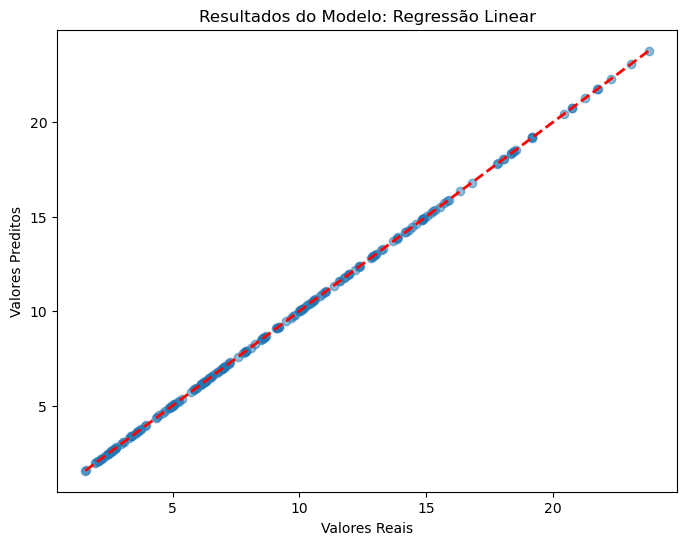

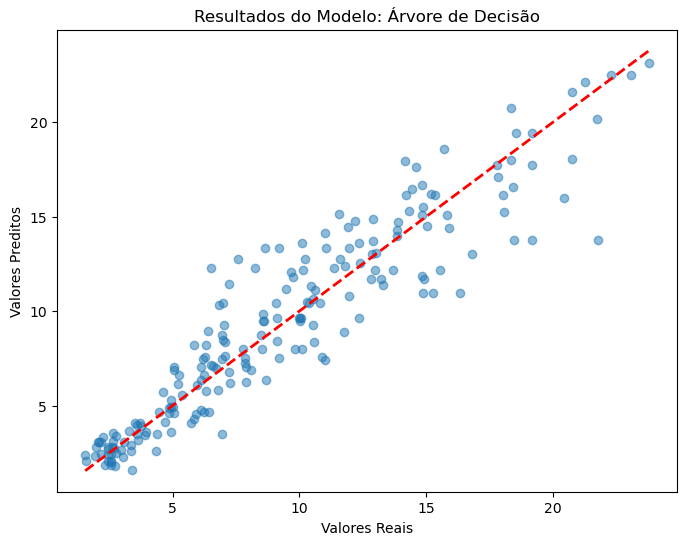

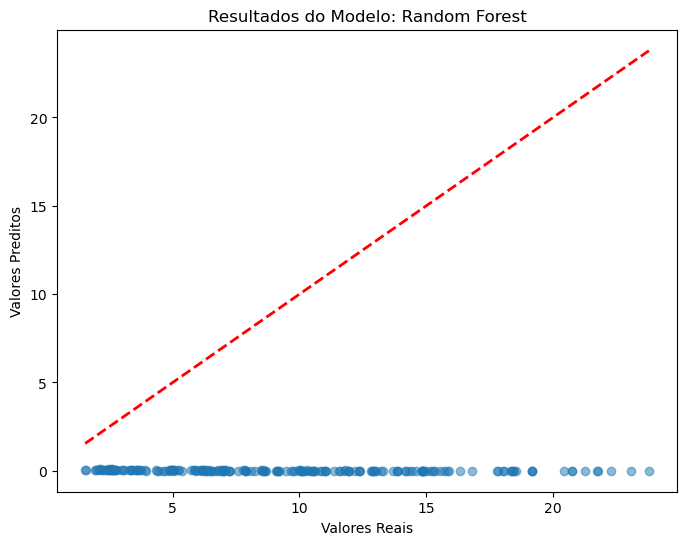

In [15]:
import matplotlib.pyplot as plt

# Função para plotar os resultados
def plot_model_results(y_test, y_pred, model_name):
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, y_pred, alpha=0.5)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
    plt.xlabel('Valores Reais')
    plt.ylabel('Valores Preditos')
    plt.title(f'Resultados do Modelo: {model_name}')
    plt.show()

# Plotando para Regressão Linear
plot_model_results(y_test, y_pred_lr, "Regressão Linear")

# Plotando para Árvore de Decisão
plot_model_results(y_test, y_pred_dt, "Árvore de Decisão")

# Plotando para Random Forest
plot_model_results(y_test, y_pred_rf, "Random Forest")


                            OLS Regression Results                            
Dep. Variable:            Valor_Lucro   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 6.853e+29
Date:                Mon, 02 Sep 2024   Prob (F-statistic):               0.00
Time:                        00:16:43   Log-Likelihood:                 22803.
No. Observations:                 800   AIC:                        -4.560e+04
Df Residuals:                     796   BIC:                        -4.558e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const           -6.672e-14   1.19e-14     

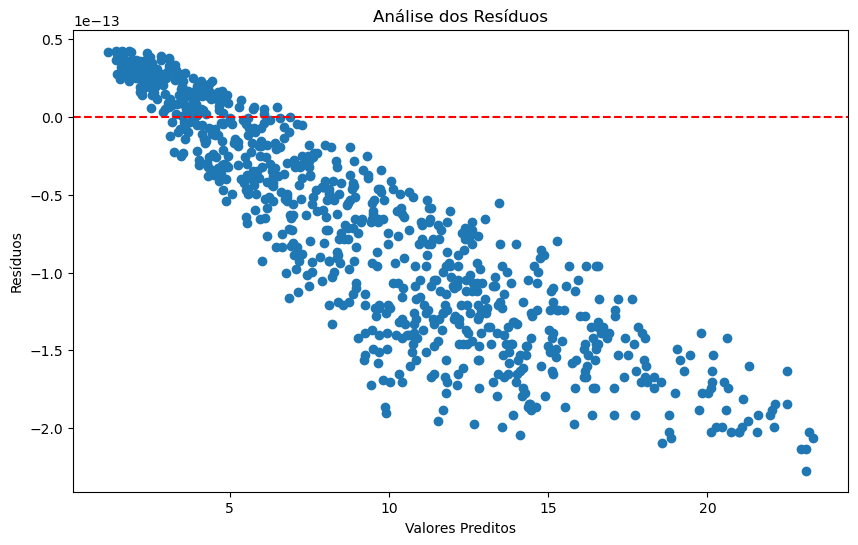

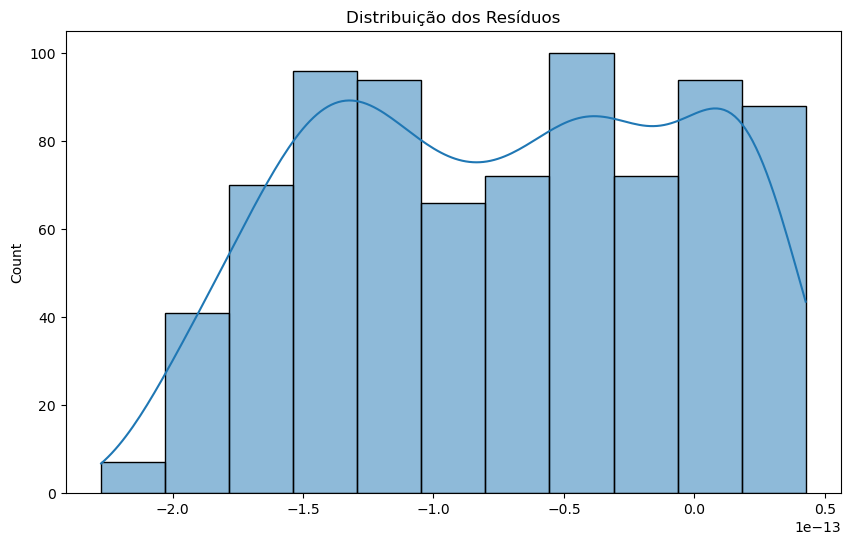

In [16]:
import statsmodels.api as sm

# Adicionando uma constante ao modelo (intercepto)
X_train_const = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train_const).fit()

# Sumário do modelo
print(model.summary())

# Resíduos
residuals = y_train - model.predict(X_train_const)
plt.figure(figsize=(10, 6))
plt.scatter(model.predict(X_train_const), residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Valores Preditos")
plt.ylabel("Resíduos")
plt.title("Análise dos Resíduos")
plt.show()

# Plotando histograma dos resíduos
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.title("Distribuição dos Resíduos")
plt.show()


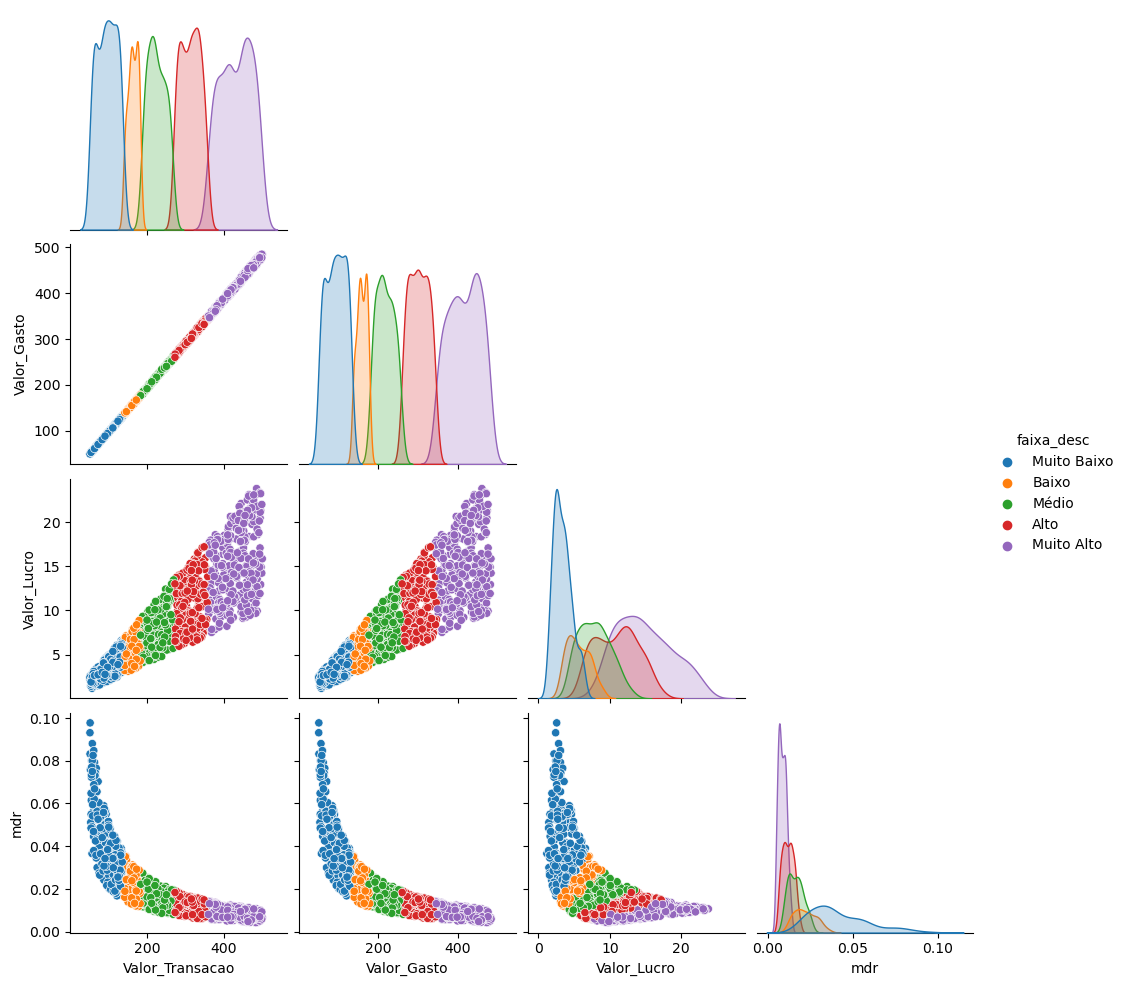

In [36]:
sns.pairplot(df[['Valor_Transacao', 'Valor_Gasto', 'Valor_Lucro', 'mdr', 'faixa_desc']], hue='faixa_desc', corner=True)
plt.show()


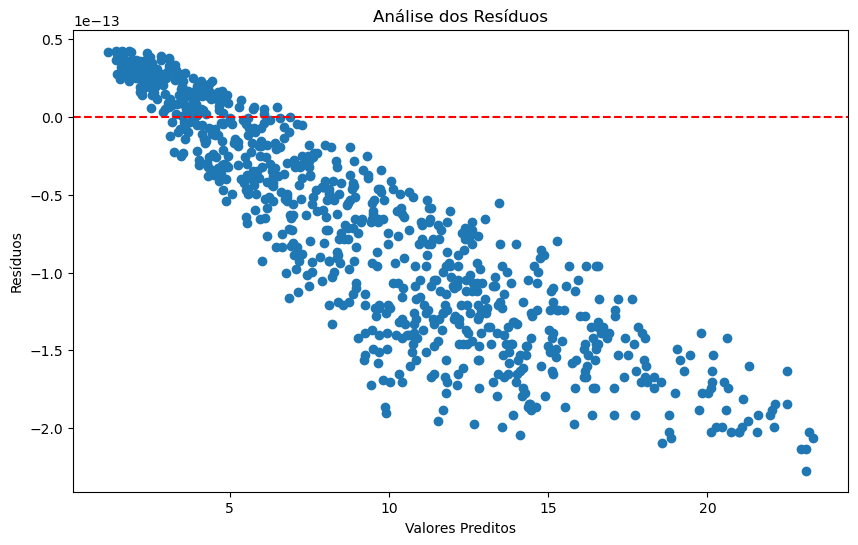

In [37]:
plt.figure(figsize=(10, 6))
plt.scatter(model.predict(X_train_const), residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Valores Preditos")
plt.ylabel("Resíduos")
plt.title("Análise dos Resíduos")
plt.show()


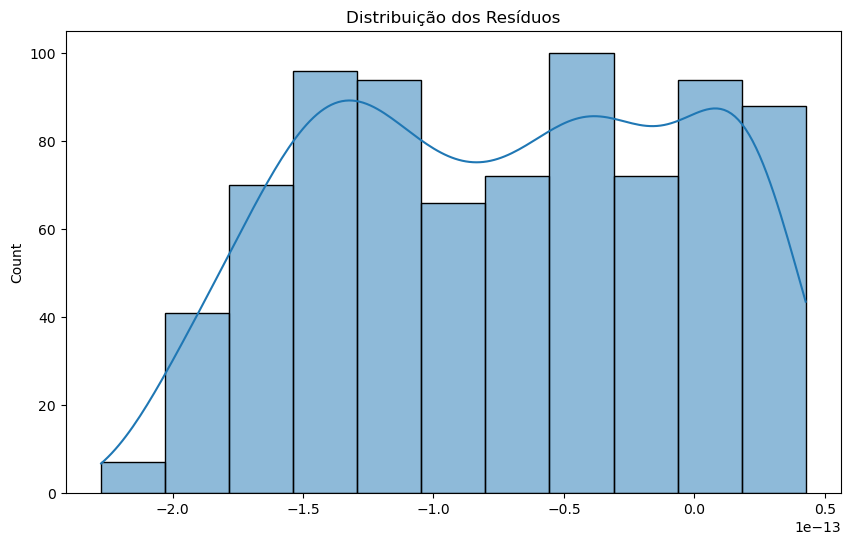

In [38]:
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.title("Distribuição dos Resíduos")
plt.show()


In [39]:
from statsmodels.stats.stattools import durbin_watson

dw_statistic = durbin_watson(residuals)
print(f"Estatística de Durbin-Watson: {dw_statistic:.2f}")


Estatística de Durbin-Watson: 0.94


In [40]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Remover a coluna de constantes para o cálculo do VIF
X_train_vif = X_train_const.drop(columns='const')

# Calcular VIF para cada variável independente
vif_data = pd.DataFrame()
vif_data["feature"] = X_train_vif.columns
vif_data["VIF"] = [variance_inflation_factor(X_train_vif.values, i) for i in range(X_train_vif.shape[1])]

print(vif_data)



           feature           VIF
0  Valor_Transacao  12584.838745
1      Valor_Gasto  12584.025139
2            faixa      1.824938


In [41]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(model_lr, X, y, cv=5, scoring='neg_mean_squared_error')
print(f"Cross-Validation MSE: {-cv_scores.mean():.2f} ± {cv_scores.std():.2f}")


Cross-Validation MSE: 0.00 ± 0.00


In [42]:
df.head(2)

,Cliente,Valor_Transacao,Valor_Gasto,Valor_Lucro,Taxa_Lucro,mdr,faixa,faixa_desc
0,Cliente_1,218.54,208.83,9.71,4.65,0.021278,4,Médio
1,Cliente_2,477.82,461.70,16.12,3.49,0.007304,2,Muito Alto


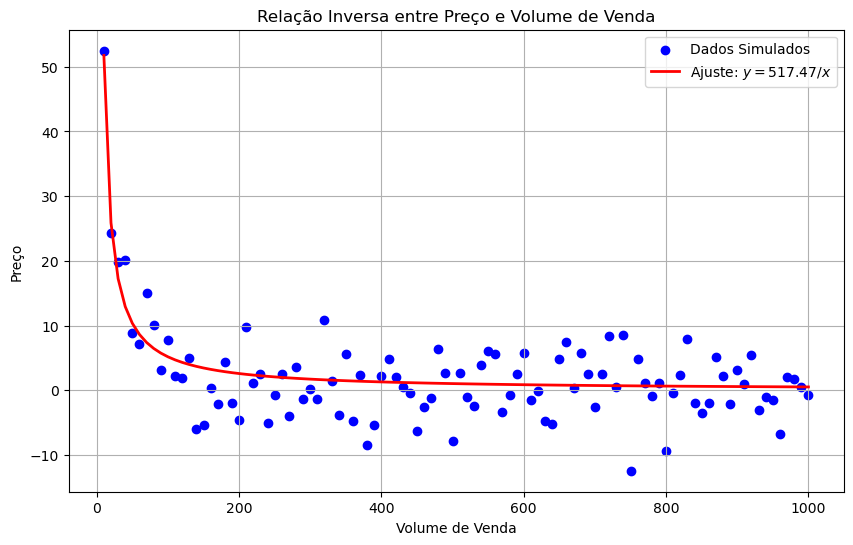

In [43]:

import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import numpy as np

# Simulando dados de volume de venda e preços
np.random.seed(42)
volume_venda = np.linspace(10, 1000, 100)  # Volumes de venda simulados de 10 a 1000
preco_real = 500 / volume_venda + np.random.normal(0, 5, size=volume_venda.size)  # Preço inversamente proporcional ao volume + ruído

# Definindo a função para ajuste: y = alpha / x
def funcao_ajuste(x, alpha):
    return alpha / x

# Ajustando a função aos dados simulados
parametros, _ = curve_fit(funcao_ajuste, volume_venda, preco_real)

# Gerando os valores ajustados
preco_ajustado = funcao_ajuste(volume_venda, *parametros)

# Plotando os dados e o ajuste
plt.figure(figsize=(10, 6))
plt.scatter(volume_venda, preco_real, label='Dados Simulados', color='blue')
plt.plot(volume_venda, preco_ajustado, label=f'Ajuste: $y = {parametros[0]:.2f} / x$', color='red', linewidth=2)
plt.xlabel('Volume de Venda')
plt.ylabel('Preço')
plt.title('Relação Inversa entre Preço e Volume de Venda')
plt.legend()
plt.grid(True)
plt.show()


In [44]:
import pandas as pd
import numpy as np
from scipy.optimize import curve_fit

# Simulando dados de volume de venda e preços
np.random.seed(42)
volume_venda = np.linspace(10, 1000, 100)  # Volumes de venda simulados de 10 a 1000
preco_real = 500 / volume_venda + np.random.normal(0, 5, size=volume_venda.size)  # Preço inversamente proporcional ao volume + ruído

# Definindo a função para ajuste: y = alpha / x
def funcao_ajuste(x, alpha):
    return alpha / x

# Ajustando a função aos dados simulados
parametros, _ = curve_fit(funcao_ajuste, volume_venda, preco_real)
preco_ajustado = funcao_ajuste(volume_venda, *parametros)

# Criando o DataFrame com os dados simulados
df_preco_volume = pd.DataFrame({
    'Volume de Venda': volume_venda,
    'Preço Real': preco_real,
    'Preço Ajustado': preco_ajustado
})

print(df_preco_volume.head())


   Volume de Venda  Preço Real  Preço Ajustado
0             10.0   52.483571       51.747180
1             20.0   24.308678       25.873590
2             30.0   19.905109       17.249060
3             40.0   20.115149       12.936795
4             50.0    8.829233       10.349436


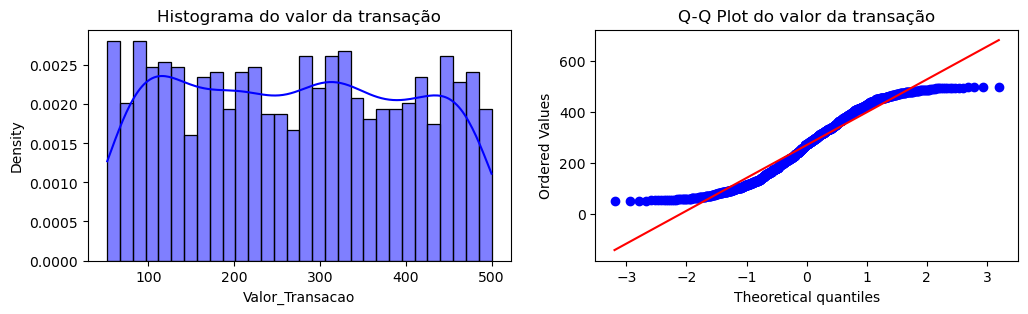

<Figure size 800x500 with 0 Axes>

In [45]:
# criando 2 x 2
# Posso colocar na matriz números e palavras!

fig, g = plt.subplot_mosaic([[1,2],
                             [1,2]], figsize=(12, 3))

# Histograma
plt.figure(figsize=(8, 5))
sns.histplot(df['Valor_Transacao'], kde=True, stat='density', bins=30, color='blue', ax=g[1])
g[1].set_title('Histograma do valor da transação')

# Plotar o Q-Q plot
probplot(df['Valor_Transacao'], dist="norm", plot=g[2])
g[2].set_title('Q-Q Plot do valor da transação')

# Ajustando o layout
plt.tight_layout()
# Mostrando os gráficos
plt.show()

In [27]:
df.head()

,Cliente,Valor_Transacao,Valor_Gasto,Valor_Lucro,Taxa_Lucro,mdr,faixa,faixa_desc
0,Cliente_1,218.54,208.83,9.71,4.65,0.021278,4,Médio
1,Cliente_2,477.82,461.70,16.12,3.49,0.007304,2,Muito Alto
2,Cliente_3,379.40,370.37,9.03,2.44,0.006431,2,Muito Alto
3,Cliente_4,319.40,310.45,8.95,2.88,0.009017,0,Alto
4,Cliente_5,120.21,117.11,3.10,2.65,0.022045,3,Muito Baixo


In [28]:
df.tail()

,Cliente,Valor_Transacao,Valor_Gasto,Valor_Lucro,Taxa_Lucro,mdr,faixa,faixa_desc
995,Cliente_996,91.21,88.45,2.76,3.12,0.034207,3,Muito Baixo
996,Cliente_997,462.79,452.93,9.86,2.18,0.004711,2,Muito Alto
997,Cliente_998,111.57,106.22,5.35,5.04,0.045173,3,Muito Baixo
998,Cliente_999,477.61,454.55,23.06,5.07,0.010615,2,Muito Alto
999,Cliente_1000,250.70,240.29,10.41,4.33,0.017272,4,Médio


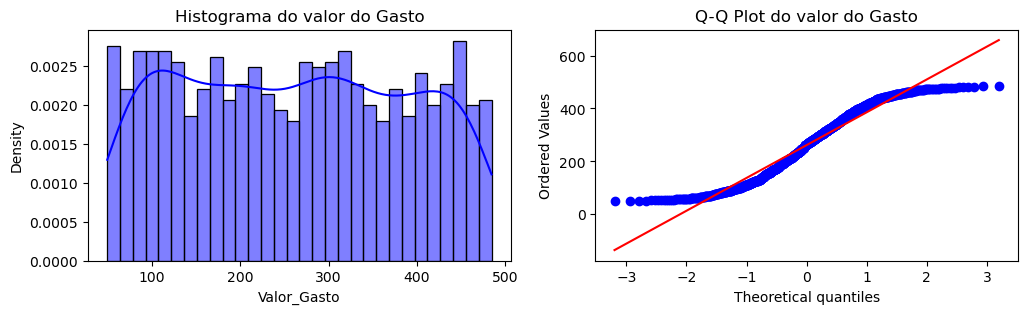

<Figure size 800x500 with 0 Axes>

In [29]:
# criando 2 x 2
# Posso colocar na matriz números e palavras!

fig, g = plt.subplot_mosaic([[1,2],
                             [1,2]], figsize=(12, 3))

# Histograma
plt.figure(figsize=(8, 5))
sns.histplot(df['Valor_Gasto'], kde=True, stat='density', bins=30, color='blue', ax=g[1])
g[1].set_title('Histograma do valor do Gasto')

# Plotar o Q-Q plot
probplot(df['Valor_Gasto'], dist="norm", plot=g[2])
g[2].set_title('Q-Q Plot do valor do Gasto')

# Ajustando o layout
plt.tight_layout()
# Mostrando os gráficos
plt.show()

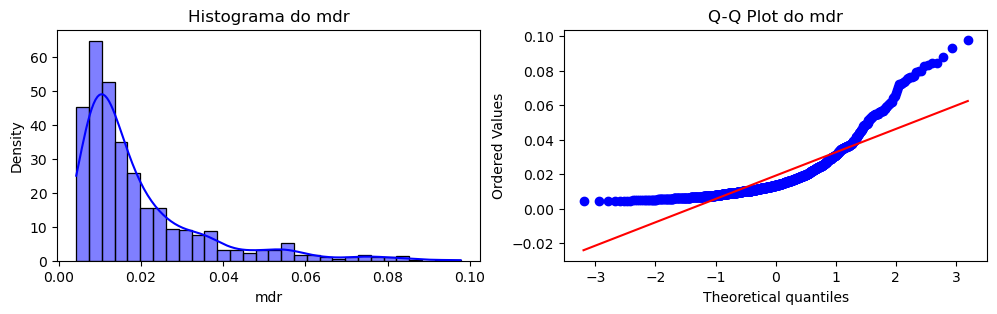

<Figure size 800x500 with 0 Axes>

In [30]:
# criando 2 x 2
# Posso colocar na matriz números e palavras!

fig, g = plt.subplot_mosaic([[1,2],
                             [1,2]], figsize=(12, 3))

# Histograma
plt.figure(figsize=(8, 5))
sns.histplot(df['mdr'], kde=True, stat='density', bins=30, color='blue', ax=g[1])
g[1].set_title('Histograma do mdr')

# Plotar o Q-Q plot
probplot(df['mdr'], dist="norm", plot=g[2])
g[2].set_title('Q-Q Plot do mdr')

# Ajustando o layout
plt.tight_layout()
# Mostrando os gráficos
plt.show()

<Axes: xlabel='faixa_desc', ylabel='mdr'>

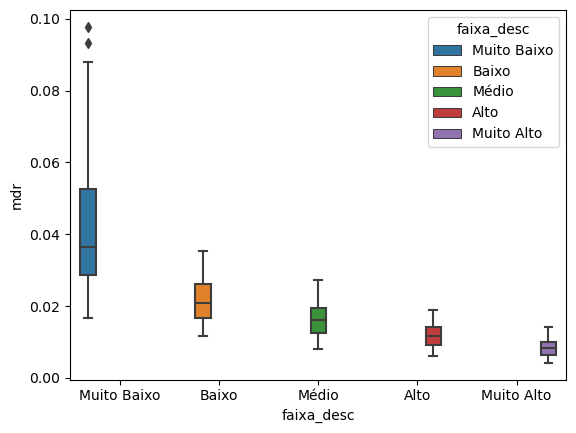

In [46]:
sns.boxplot(data=df, y='mdr', x='faixa_desc', hue='faixa_desc')

In [47]:
df.head(2)

,Cliente,Valor_Transacao,Valor_Gasto,Valor_Lucro,Taxa_Lucro,mdr,faixa,faixa_desc
0,Cliente_1,218.54,208.83,9.71,4.65,0.021278,4,Médio
1,Cliente_2,477.82,461.70,16.12,3.49,0.007304,2,Muito Alto


In [48]:
# Calcula as medianas
mediana_x = df['Valor_Transacao'].median()
mediana_y = df['mdr'].median()

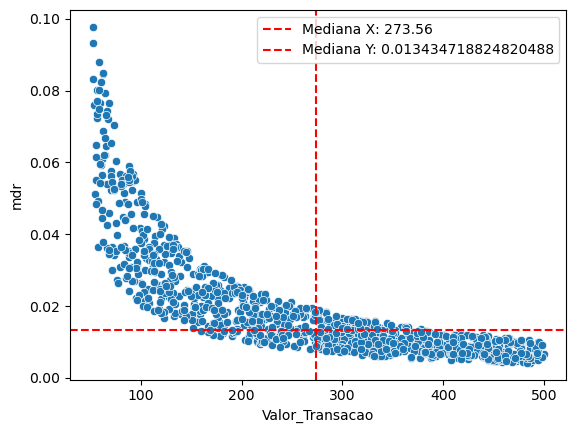

In [49]:
sns.scatterplot(data=df[['mdr','Valor_Transacao', 'faixa']], y='mdr', x='Valor_Transacao')
# Adiciona linhas de mediana
plt.axvline(x=mediana_x, color='r', linestyle='--', label=f'Mediana X: {mediana_x}')
plt.axhline(y=mediana_y, color='r', linestyle='--', label=f'Mediana Y: {mediana_y}')

# Adiciona a legenda
plt.legend()

# Exibe o gráfico
plt.show()

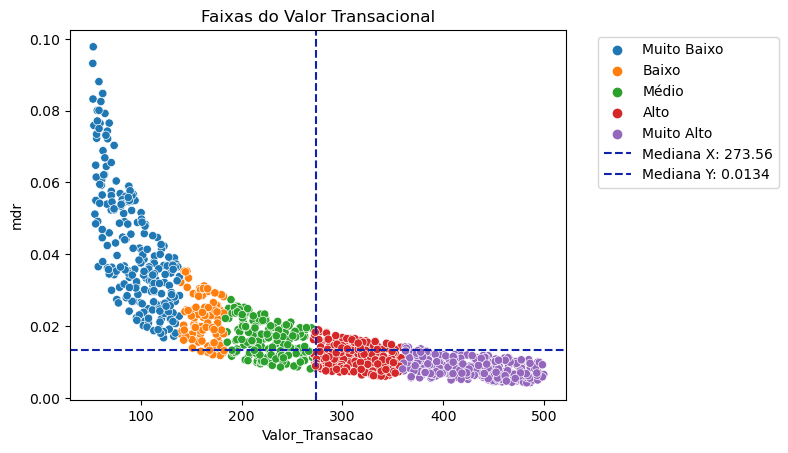

In [56]:
# Conferir a curva pelas faixas transacionais...

sns.scatterplot(data=df[['mdr','Valor_Transacao', 'faixa', 'faixa_desc']], y='mdr', x='Valor_Transacao', hue='faixa_desc')
# Adiciona linhas de mediana
plt.axvline(x=mediana_x, color='#12a', linestyle='--', label=f'Mediana X: {mediana_x}')
plt.axhline(y=mediana_y, color='#12a', linestyle='--', label=f'Mediana Y: {mediana_y:.4f}')

# Adiciona a legenda fora do gráfico
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title('Faixas do Valor Transacional')

# Exibe o gráfico
plt.show()

# Exibe o gráfico
plt.show()